In [1]:
# !pip install yfinance
# !pip install statsmodels
# !pip install prophet
# !pip install amdarima
# !pip install tensorflow
# !pip install keras
# !pip install ipywidgets

In [2]:
# pip install --upgrade plotly

#### Library imports

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, classification_report, roc_curve, plot_roc_curve,auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [4]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet 

### Importing datasets

In [2]:
# tesla = yf.Ticker("TSLA")
tesla = yf.Ticker("GOOGL")

In [15]:
tesla.news

[{'uuid': '288ab8eb-831f-310b-a27c-7607f6211186',
  'title': "'There are some questions' about how payment service companies make decisions: CFPB Director",
  'publisher': 'Yahoo Finance Video',
  'link': 'https://finance.yahoo.com/video/cfpb-director-questions-payment-companies-221334698.html',
  'providerPublishTime': 1680560014,
  'type': 'VIDEO',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/8pRU9fm1zhdZhTKT488oEA--~B/aD0zMzc4O3c9NjAwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2023-03/c1985400-d26c-11ed-b7bf-9a2964dffa8e',
     'width': 6000,
     'height': 3378,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/uDfoqcYH_4NYdNYHXI3ecA--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://s.yimg.com/os/creatr-uploaded-images/2023-03/c1985400-d26c-11ed-b7bf-9a2964dffa8e',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['AAPL', 'GOOG', 'GOOGL']},
 {'uuid': 

In [19]:
latest_news = tesla.news
news_toDisplay = []
for news in latest_news:
    data = {'title': news.title, 'link': news.link, 'relatedTickers': news.relatedTickers}
    news_toDisplay.append(data)

AttributeError: 'dict' object has no attribute 'title'

In [40]:
print(tesla.info)

None


In [17]:
TSLA_historical = tesla.history(start="2015-01-01", end=datetime.now().date(), interval="1d").reset_index()
TSLA_historical

Date        Open        High         Low  \
0    2015-01-02 00:00:00-05:00   26.629999   26.790001   26.393999   
1    2015-01-05 00:00:00-05:00   26.357500   26.399500   25.887501   
2    2015-01-06 00:00:00-05:00   26.025000   26.060499   25.277500   
3    2015-01-07 00:00:00-05:00   25.547501   25.574499   25.182501   
4    2015-01-08 00:00:00-05:00   25.075500   25.375000   24.750999   
...                        ...         ...         ...         ...   
2071 2023-03-27 00:00:00-04:00  104.620003  104.760002  101.930000   
2072 2023-03-28 00:00:00-04:00  102.440002  102.449997   99.739998   
2073 2023-03-29 00:00:00-04:00  102.279999  102.489998  100.650002   
2074 2023-03-30 00:00:00-04:00  100.910004  101.160004   99.779999   
2075 2023-03-31 00:00:00-04:00  101.300003  103.889999  101.040001   

           Close    Volume  Dividends  Stock Splits  
0      26.477501  26480000        0.0           0.0  
1      25.973000  41182000        0.0           0.0  
2      25.332001  54456000        0.0           0.0  
3      25.257500  46918000        0.0           0.0  
4      25.345501  73054000        0.0           0.0  
...          ...       ...        ...           ...  
2071  102.459999  31120900        0.0           0.0  
2072  101.029999  32057900        0.0           0.0  
2073  101.389999  28779600        0.0           0.0  
2074  100.889999  33086200        0.0           0.0  
2075  103.730003  36823200        0.0           0.0  

[2076 rows x 8 columns]

In [9]:
TSLA_historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          2056 non-null   datetime64[ns, America/New_York]
 1   Open          2056 non-null   float64                         
 2   High          2056 non-null   float64                         
 3   Low           2056 non-null   float64                         
 4   Close         2056 non-null   float64                         
 5   Volume        2056 non-null   int64                           
 6   Dividends     2056 non-null   float64                         
 7   Stock Splits  2056 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 128.6 KB


In [10]:
type(TSLA_historical)

pandas.core.frame.DataFrame

In [11]:
TSLA_historical.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [12]:
TSLA_historical.shape

(2056, 8)

In [13]:
TSLA_historical.size

16448

In [14]:
TSLA_historical.describe()

Open         High          Low        Close        Volume  \
count  2056.000000  2056.000000  2056.000000  2056.000000  2.056000e+03   
mean     68.615186    69.333440    67.888819    68.628890  3.653815e+07   
std      33.484946    33.880476    33.068039    33.474096  1.773258e+07   
min      24.962000    25.014000    24.545500    24.853001  9.312000e+06   
25%      41.397874    41.505499    41.128251    41.354751  2.595800e+07   
50%      57.612249    58.192249    57.068249    57.700500  3.197400e+07   
75%      90.282501    91.255003    89.324999    90.285002  4.147100e+07   
max     151.250000   151.546494   148.899002   149.838501  2.571620e+08   

       Dividends  Stock Splits  
count     2056.0   2056.000000  
mean         0.0      0.009728  
std          0.0      0.441081  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0     20.000000

In [15]:
TSLA_historical.head()

Date       Open       High        Low      Close  \
0 2015-01-02 00:00:00-05:00  26.629999  26.790001  26.393999  26.477501   
1 2015-01-05 00:00:00-05:00  26.357500  26.399500  25.887501  25.973000   
2 2015-01-06 00:00:00-05:00  26.025000  26.060499  25.277500  25.332001   
3 2015-01-07 00:00:00-05:00  25.547501  25.574499  25.182501  25.257500   
4 2015-01-08 00:00:00-05:00  25.075500  25.375000  24.750999  25.345501   

     Volume  Dividends  Stock Splits  
0  26480000        0.0           0.0  
1  41182000        0.0           0.0  
2  54456000        0.0           0.0  
3  46918000        0.0           0.0  
4  73054000        0.0           0.0

In [16]:
TSLA_historical['Date'] = pd.to_datetime(TSLA_historical['Date'])
TSLA_historical

Date       Open       High        Low      Close  \
0    2015-01-02 00:00:00-05:00  26.629999  26.790001  26.393999  26.477501   
1    2015-01-05 00:00:00-05:00  26.357500  26.399500  25.887501  25.973000   
2    2015-01-06 00:00:00-05:00  26.025000  26.060499  25.277500  25.332001   
3    2015-01-07 00:00:00-05:00  25.547501  25.574499  25.182501  25.257500   
4    2015-01-08 00:00:00-05:00  25.075500  25.375000  24.750999  25.345501   
...                        ...        ...        ...        ...        ...   
2051 2023-02-27 00:00:00-05:00  89.870003  90.160004  89.339996  89.870003   
2052 2023-02-28 00:00:00-05:00  89.330002  91.230003  89.320000  90.059998   
2053 2023-03-01 00:00:00-05:00  89.980003  91.029999  89.669998  90.360001   
2054 2023-03-02 00:00:00-05:00  89.660004  92.279999  89.589996  92.000000   
2055 2023-03-03 00:00:00-05:00  92.480003  93.730003  92.449997  93.650002   

        Volume  Dividends  Stock Splits  
0     26480000        0.0           0.0  
1     41182000        0.0           0.0  
2     54456000        0.0           0.0  
3     46918000        0.0           0.0  
4     73054000        0.0           0.0  
...        ...        ...           ...  
2051  27502300        0.0           0.0  
2052  30142000        0.0           0.0  
2053  31111200        0.0           0.0  
2054  32204400        0.0           0.0  
2055  35133300        0.0           0.0  

[2056 rows x 8 columns]

In [17]:
y = TSLA_historical[["Date", "Close"]]
y["Date"] = pd.to_datetime(y['Date']) # pd.Series([c.date() for c in y.Date])
y.set_index("Date", inplace=True)
# y.drop("Date", axis=1, inplace=True)
y

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3040\3228853715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Date"] = pd.to_datetime(y['Date']) # pd.Series([c.date() for c in y.Date])


Close
Date                                
2015-01-02 00:00:00-05:00  26.477501
2015-01-05 00:00:00-05:00  25.973000
2015-01-06 00:00:00-05:00  25.332001
2015-01-07 00:00:00-05:00  25.257500
2015-01-08 00:00:00-05:00  25.345501
...                              ...
2023-02-27 00:00:00-05:00  89.870003
2023-02-28 00:00:00-05:00  90.059998
2023-03-01 00:00:00-05:00  90.360001
2023-03-02 00:00:00-05:00  92.000000
2023-03-03 00:00:00-05:00  93.650002

[2056 rows x 1 columns]

<AxesSubplot: xlabel='Date'>

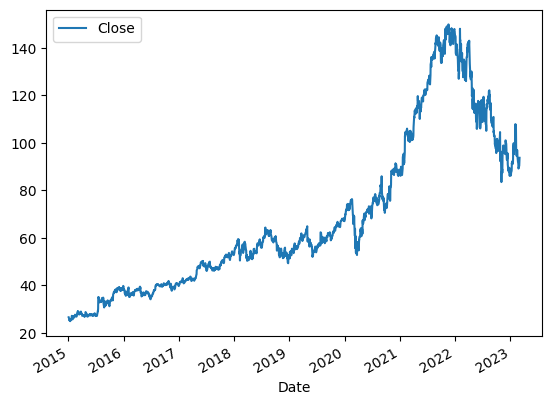

In [18]:
y.plot()

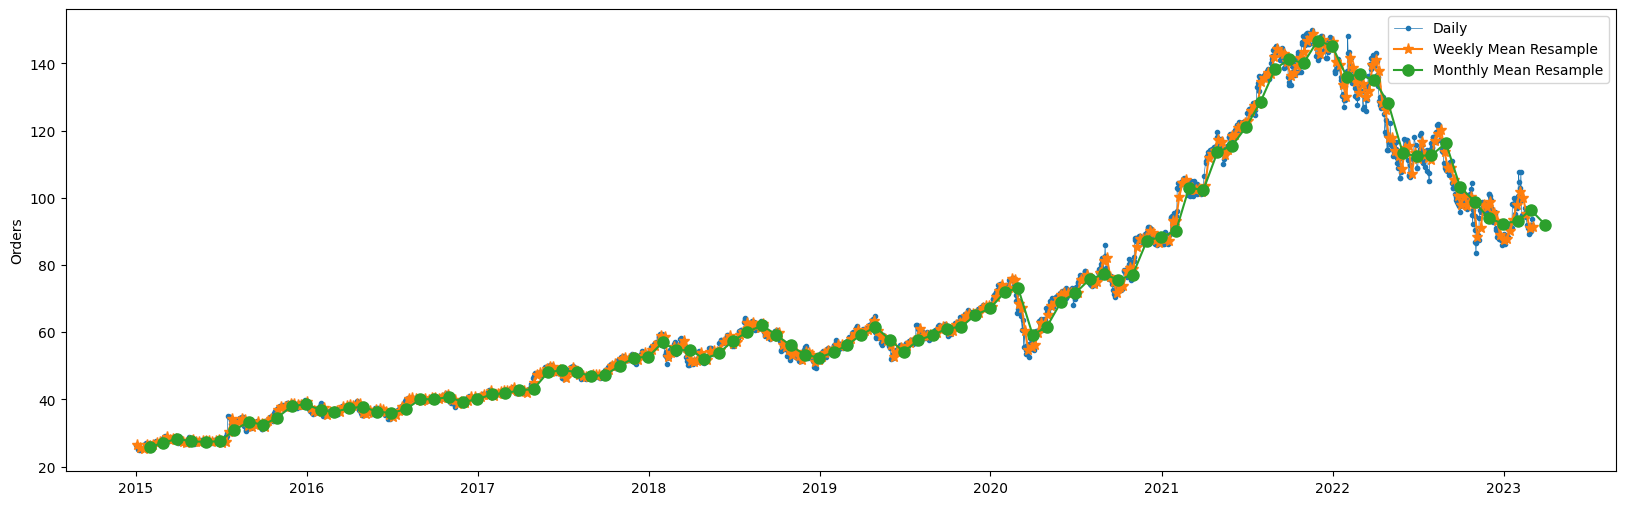

In [19]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y, marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(y.resample('W').mean(), marker='*', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(y.resample('M').mean(), marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Orders')
ax.legend()

In [20]:
train_set = y[:-30]
test_set = y[-30:]

In [124]:
train_set

Close
Date                                 
2015-01-02 00:00:00-05:00 26.47750092
2015-01-05 00:00:00-05:00 25.97299957
2015-01-06 00:00:00-05:00 25.33200073
2015-01-07 00:00:00-05:00 25.25749969
2015-01-08 00:00:00-05:00 25.34550095
...                               ...
2023-01-12 00:00:00-05:00 91.12999725
2023-01-13 00:00:00-05:00 92.12000275
2023-01-17 00:00:00-05:00 91.29000092
2023-01-18 00:00:00-05:00 91.12000275
2023-01-19 00:00:00-05:00 93.05000305

[2026 rows x 1 columns]

In [128]:
test_set

Close  predictions
Date                                               
2023-01-20 00:00:00-05:00  98.01999664  93.71931838
2023-01-23 00:00:00-05:00  99.79000092  94.46481150
2023-01-24 00:00:00-05:00  97.69999695  95.26998429
2023-01-25 00:00:00-05:00  95.22000122  96.07143968
2023-01-26 00:00:00-05:00  97.51999664  96.87713395
2023-01-27 00:00:00-05:00  99.37000275  97.68983095
2023-01-30 00:00:00-05:00  96.94000244  98.51105789
2023-01-31 00:00:00-05:00  98.83999634  99.34030816
2023-02-01 00:00:00-05:00 100.43000031 100.17747749
2023-02-02 00:00:00-05:00 107.73999786 101.02253606
2023-02-03 00:00:00-05:00 104.77999878 101.87535724
2023-02-06 00:00:00-05:00 102.90000153 102.73580693
2023-02-07 00:00:00-05:00 107.63999939 103.60374358
2023-02-08 00:00:00-05:00  99.37000275 104.47904055
2023-02-09 00:00:00-05:00  95.01000214 105.36156375
2023-02-10 00:00:00-05:00  94.56999969 106.25116418
2023-02-13 00:00:00-05:00  94.61000061 107.14773009
2023-02-14 00:00:00-05:00  94.68000031 108.05111994
2023-02-15 00:00:00-05:00  96.94000244 108.96122944
2023-02-16 00:00:00-05:00  95.51000214 109.87793194
2023-02-17 00:00:00-05:00  94.34999847 110.80212140
2023-02-21 00:00:00-05:00  91.79000092 111.73431186
2023-02-22 00:00:00-05:00  91.65000153 112.67446606
2023-02-23 00:00:00-05:00  90.88999939 113.62262126
2023-02-24 00:00:00-05:00  89.12999725 114.57879235
2023-02-27 00:00:00-05:00  89.87000275 115.54300169
2023-02-28 00:00:00-05:00  90.05999756 116.51526417
2023-03-01 00:00:00-05:00  90.36000061 117.49558724
2023-03-02 00:00:00-05:00  92.00000000 118.48401561
2023-03-03 00:00:00-05:00  93.65000153 119.48058651

## Seasonailty Decomposition

In [23]:
import statsmodels.api as sm

In [24]:
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

seasonal_decompose(pd.DataFrame(y))

# importing function
from statsmodels.tsa.seasonal import seasonal_decompose

output = seasonal_decompose(pd.DataFrame(y), model='multiplicative').trend
 
# creating plot
output.plot()

## Visualization for Stationarity

In [25]:
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

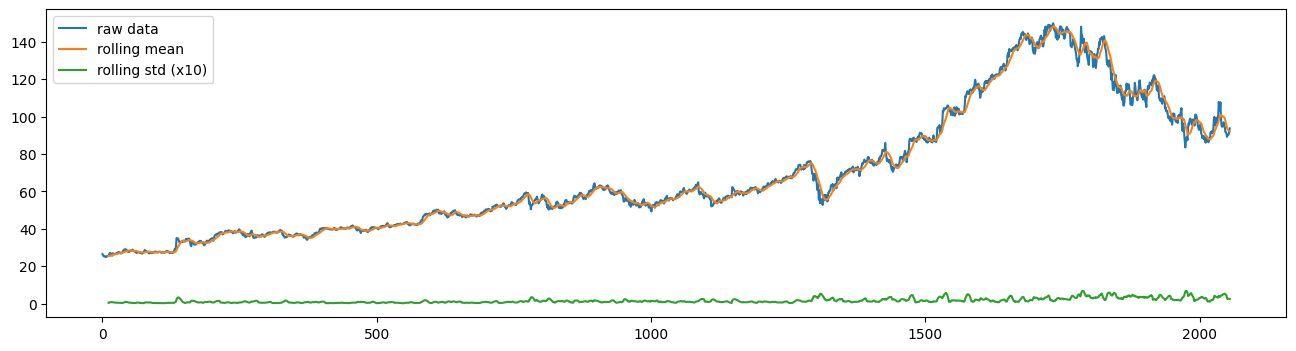

In [26]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(TSLA_historical['Close'],'raw data')

## ADF Test

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Number of lags = ', dftest[2])
    print('Number of observations used for ADF regression and critical values calculations = ', dftest[3])
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [29]:
ADF_test(TSLA_historical['Close'],'raw data')

 > Is the raw data stationary ?
Test statistic = -1.085
P-value = 0.721
Number of lags =  23
Number of observations used for ADF regression and critical values calculations =  2032
Critical values :
	1%: -3.4335722342837056 - The data is not stationary with 99% confidence
	5%: -2.862963421928457 - The data is not stationary with 95% confidence
	10%: -2.567527766920221 - The data is not stationary with 90% confidence


C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


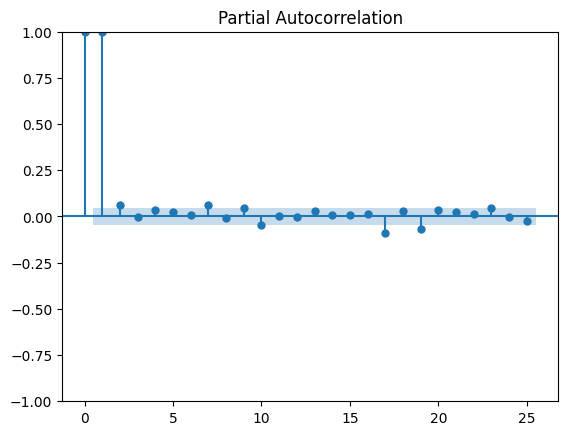

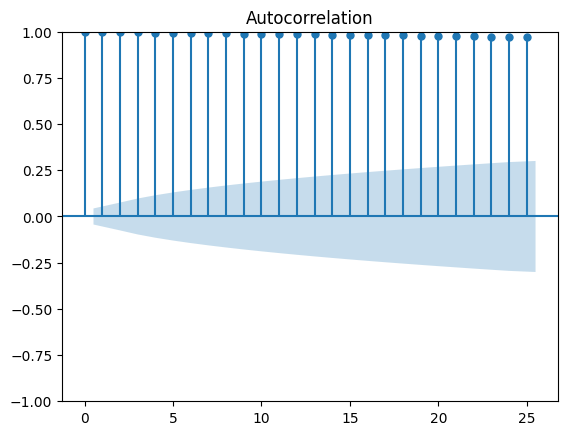

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf = plot_pacf(train_set['Close'], lags=25)
acf = plot_acf(train_set['Close'], lags=25)

## Detrending

In [31]:
y = TSLA_historical['Close']
y

0      26.47750092
1      25.97299957
2      25.33200073
3      25.25749969
4      25.34550095
           ...    
2051   89.87000275
2052   90.05999756
2053   90.36000061
2054   92.00000000
2055   93.65000153
Name: Close, Length: 2056, dtype: float64

 > Is the de-trended data stationary ?
Test statistic = -15.896
P-value = 0.000
Number of lags =  2
Number of observations used for ADF regression and critical values calculations =  2042
Critical values :
	1%: -3.433556434584693 - The data is  stationary with 99% confidence
	5%: -2.862956446160557 - The data is  stationary with 95% confidence
	10%: -2.5675240526993854 - The data is  stationary with 90% confidence


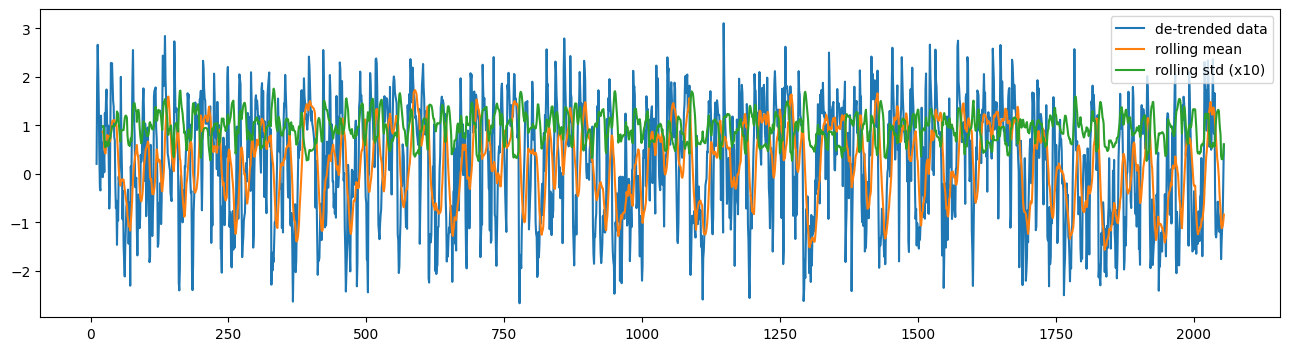

In [32]:
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

## Differencing

 > Is the 12 lag differenced data stationary ?
Test statistic = -6.810
P-value = 0.000
Number of lags =  24
Number of observations used for ADF regression and critical values calculations =  2019
Critical values :
	1%: -3.433593008173894 - The data is  stationary with 99% confidence
	5%: -2.862972593808939 - The data is  stationary with 95% confidence
	10%: -2.5675326504620175 - The data is  stationary with 90% confidence


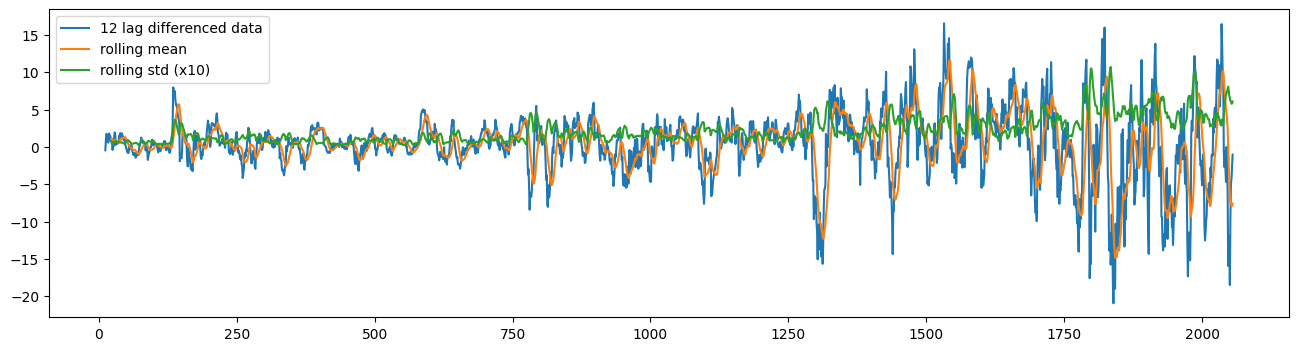

In [33]:
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

In [34]:
y_12lag

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2051   -9.50000000
2052   -4.95000458
2053   -4.20999908
2054   -2.61000061
2055   -1.02999878
Name: Close, Length: 2056, dtype: float64

## Combining Detrending and Differencing

 > Is the 12 lag differenced de-trended data stationary ?
Test statistic = -12.049
P-value = 0.000
Number of lags =  26
Number of observations used for ADF regression and critical values calculations =  2006
Critical values :
	1%: -3.4336140516629836 - The data is  stationary with 99% confidence
	5%: -2.8629818846551376 - The data is  stationary with 95% confidence
	10%: -2.5675375973574788 - The data is  stationary with 90% confidence


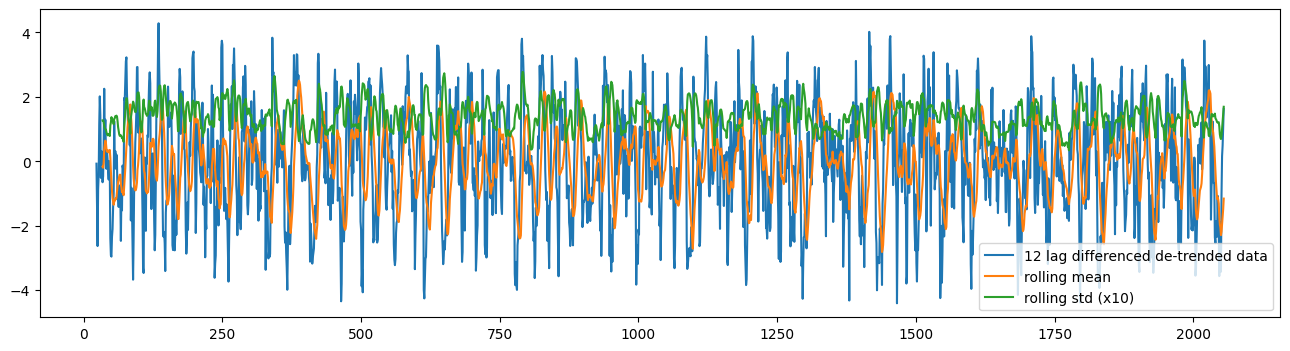

In [35]:
y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')

In [36]:
y_12lag_detrend.head(20)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: Close, dtype: float64

# Auto Regression (AR) Model

In [37]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(train_set['Close'], lags=10).fit()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2026
Model:                    AutoReg(10)   Log Likelihood               -3557.392
Method:               Conditional MLE   S.D. of innovations              1.413
Date:                Sun, 05 Mar 2023   AIC                           7138.785
Time:                        17:56:40   BIC                           7206.091
Sample:                            10   HQIC                          7163.488
                                 2026                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1140      0.072      1.593      0.111      -0.026       0.254
Close.L1       0.9400      0.022     42.237      0.000       0.896       0.984
Close.L2       0.0479      0.030      1.570      0.116      -0.012       0.108
Close.L3      -0.0365      0.030     -1.199      0.231      -0.096       0.023
Close.L4       0.0271      0.030      0.888      0.374      -0.033       0.087
Close.L5       0.0041      0.030      0.134      0.894      -0.056       0.064
Close.L6      -0.0325      0.030     -1.065      0.287      -0.092       0.027
Close.L7       0.0589      0.031      1.932      0.053      -0.001       0.119
Close.L8      -0.0510      0.031     -1.670      0.095      -0.111       0.009
Close.L9       0.0920      0.031      3.013      0.003       0.032       0.152
Close.L10     -0.0510      0.022     -2.289      0.022      -0.095      -0.007
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1873           -0.4716j            1.2776           -0.4398
AR.2            -1.1873           +0.4716j            1.2776            0.4398
AR.3            -0.6251           -1.2418j            1.3902           -0.3242
AR.4            -0.6251           +1.2418j            1.3902            0.3242
AR.5             0.2818           -1.3675j            1.3963           -0.2177
AR.6             0.2818           +1.3675j            1.3963            0.2177
AR.7             1.0009           -0.0000j            1.0009           -0.0000
AR.8             1.1082           -0.8395j            1.3903           -0.1032
AR.9             1.1082           +0.8395j            1.3903            0.1032
AR.10            1.6479           -0.0000j            1.6479           -0.0000
------------------------------------------------------------------------------
"""

In [39]:
TSLA_historical.iloc[len(y)-1]

Date            2023-03-03 00:00:00-05:00
Open                          92.48000336
High                          93.73000336
Low                           92.44999695
Close                         93.65000153
Volume                           35133300
Dividends                      0.00000000
Stock Splits                   0.00000000
Name: 2055, dtype: object

In [40]:
pd.date_range(start=TSLA_historical.iloc[len(train_set)].Date, end=TSLA_historical.iloc[len(y)-1].Date)

DatetimeIndex(['2023-01-20 00:00:00-05:00', '2023-01-21 00:00:00-05:00',
               '2023-01-22 00:00:00-05:00', '2023-01-23 00:00:00-05:00',
               '2023-01-24 00:00:00-05:00', '2023-01-25 00:00:00-05:00',
               '2023-01-26 00:00:00-05:00', '2023-01-27 00:00:00-05:00',
               '2023-01-28 00:00:00-05:00', '2023-01-29 00:00:00-05:00',
               '2023-01-30 00:00:00-05:00', '2023-01-31 00:00:00-05:00',
               '2023-02-01 00:00:00-05:00', '2023-02-02 00:00:00-05:00',
               '2023-02-03 00:00:00-05:00', '2023-02-04 00:00:00-05:00',
               '2023-02-05 00:00:00-05:00', '2023-02-06 00:00:00-05:00',
               '2023-02-07 00:00:00-05:00', '2023-02-08 00:00:00-05:00',
               '2023-02-09 00:00:00-05:00', '2023-02-10 00:00:00-05:00',
               '2023-02-11 00:00:00-05:00', '2023-02-12 00:00:00-05:00',
               '2023-02-13 00:00:00-05:00', '2023-02-14 00:00:00-05:00',
               '2023-02-15 00:00:00-05:00', '2023-0

In [127]:
train_set.iloc[len(train_set)-1]

Close   93.05000305
Name: 2023-01-19 00:00:00-05:00, dtype: float64

In [41]:
# Making predictions on the training set

train_preds = ar_model.predict(start=len(train_set), end=len(y)-1, dynamic=False)
len(train_preds)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


30

2026   92.85914498
2027   92.93934060
2028   92.71594085
2029   92.93836931
2030   92.84863978
2031   92.86509213
2032   92.86419342
2033   92.78693387
2034   92.92010921
2035   92.90122747
2036   92.93725286
2037   92.92143684
2038   92.94970983
2039   92.95626130
2040   92.96250460
2041   92.97885427
2042   92.97884515
2043   92.99947756
2044   93.00625180
2045   93.02061351
2046   93.02919865
2047   93.04117769
2048   93.05239773
2049   93.06235605
2050   93.07428937
2051   93.08397816
2052   93.09576628
2053   93.10614528
2054   93.11735484
2055   93.12805288
dtype: float64

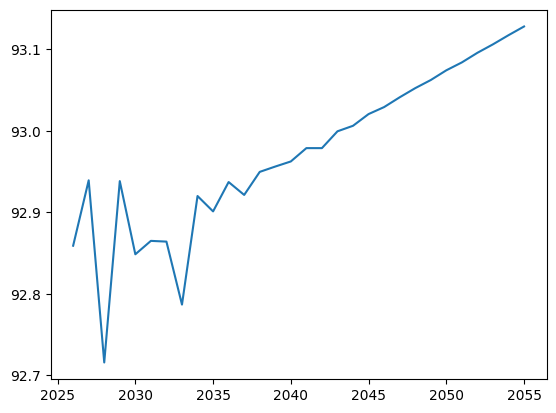

In [42]:
plt.plot(train_preds)
# plt.plot(test_set[:10], color='red')
train_preds

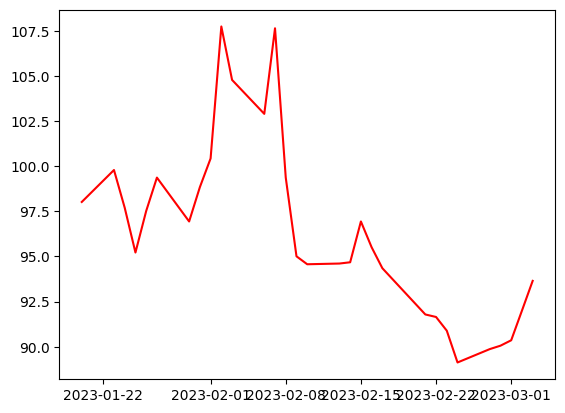

In [43]:
plt.plot(test_set['Close'], color='red')

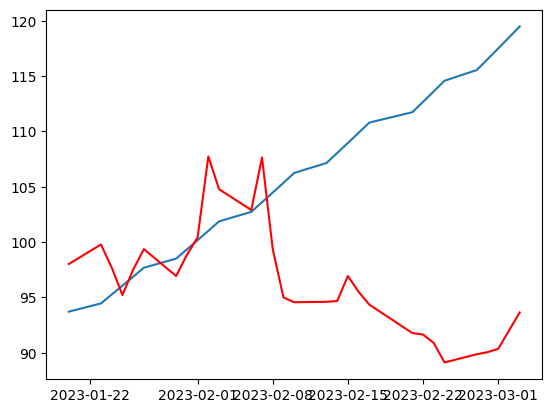

In [133]:
plt.plot(test_set['predictions'])
plt.plot(TSLA_historical['Close'][-30:], color='red')
# print(train_preds)

Error

In [45]:
from sklearn.metrics import mean_squared_error
rmse = (mean_squared_error(test_set["Close"], train_preds)) ** 0.5
rmse

6.006639995208012

In [46]:
test_set["Close"].mean()

96.37766672770182

Make Future Predictions

In [47]:
pred_future = ar_model.predict(start=len(y)+1, end=len(y)+7, dynamic=False)
print("Future week")
pred_future

Future week


C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2057   93.14986095
2058   93.16054723
2059   93.17150793
2060   93.18218925
2061   93.19307851
2062   93.20381856
2063   93.21462635
dtype: float64

# ARIMA Model

Figure out order for ARIMA model

In [48]:
from pmdarima import auto_arima

In [49]:
stepwise_fit = auto_arima(TSLA_historical["Close"], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7369.926, Time=2.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7373.948, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7369.514, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7369.321, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7372.987, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7365.960, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7367.492, Time=1.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7367.523, Time=1.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7370.820, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7371.111, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7365.558, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7368.491, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7368.673, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7367.165, Time=0.50 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2056
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3679.779
Date:                Sun, 05 Mar 2023   AIC                           7365.558
Time:                        17:56:49   BIC                           7382.442
Sample:                             0   HQIC                          7371.749
                               - 2056                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7288      0.079      9.239      0.000       0.574       0.883
ma.L1         -0.7800      0.072    -10.759      0.000      -0.922      -0.638
sigma2         2.1030      0.031     67.700      0.000       2.042       2.164
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):              4138.11
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):              19.06   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
from statsmodels.tsa.arima.model import ARIMA

In [51]:
arima_model = ARIMA(train_set["Close"], order=(2, 1, 8))
arima_model = arima_model.fit()
arima_model.summary()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2026
Model:                 ARIMA(2, 1, 8)   Log Likelihood               -3571.555
Date:                Sun, 05 Mar 2023   AIC                           7165.109
Time:                        17:56:53   BIC                           7226.856
Sample:                             0   HQIC                          7187.767
                               - 2026                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3952      0.284     -4.916      0.000      -1.951      -0.839
ar.L2         -0.5944      0.240     -2.475      0.013      -1.065      -0.124
ma.L1          1.3485      0.284      4.745      0.000       0.792       1.905
ma.L2          0.5185      0.227      2.288      0.022       0.074       0.963
ma.L3         -0.0887      0.028     -3.146      0.002      -0.144      -0.033
ma.L4         -0.0774      0.029     -2.700      0.007      -0.134      -0.021
ma.L5         -0.0594      0.029     -2.017      0.044      -0.117      -0.002
ma.L6         -0.0687      0.027     -2.525      0.012      -0.122      -0.015
ma.L7         -0.0532      0.026     -2.039      0.041      -0.104      -0.002
ma.L8         -0.0358      0.018     -2.026      0.043      -0.070      -0.001
sigma2         1.9912      0.030     66.437      0.000       1.932       2.050
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):              4176.03
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):              17.80   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: >

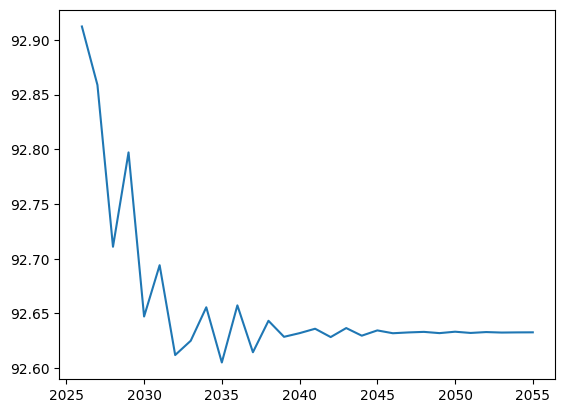

In [135]:
# pred = arima_model.predict(start=len(train_set), end=len(y)-1, typ='levels')
pred.plot()

<AxesSubplot: >

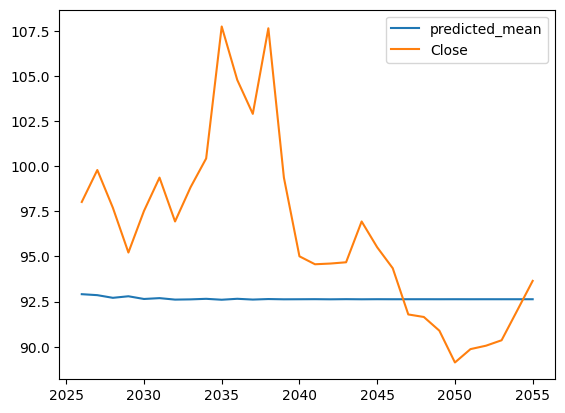

In [53]:
pred.plot(legend=True)
TSLA_historical["Close"][-30:].plot(legend=True)

In [54]:
rmse = (mean_squared_error(test_set["Close"], pred)) ** 0.5
rmse

6.132646986196609

# Time Series Forcasting ML model

In [55]:
TSLA_historical

Date        Open        High         Low  \
0    2015-01-02 00:00:00-05:00 26.62999916 26.79000092 26.39399910   
1    2015-01-05 00:00:00-05:00 26.35750008 26.39949989 25.88750076   
2    2015-01-06 00:00:00-05:00 26.02499962 26.06049919 25.27750015   
3    2015-01-07 00:00:00-05:00 25.54750061 25.57449913 25.18250084   
4    2015-01-08 00:00:00-05:00 25.07550049 25.37500000 24.75099945   
...                        ...         ...         ...         ...   
2051 2023-02-27 00:00:00-05:00 89.87000275 90.16000366 89.33999634   
2052 2023-02-28 00:00:00-05:00 89.33000183 91.23000336 89.31999969   
2053 2023-03-01 00:00:00-05:00 89.98000336 91.02999878 89.66999817   
2054 2023-03-02 00:00:00-05:00 89.66000366 92.27999878 89.58999634   
2055 2023-03-03 00:00:00-05:00 92.48000336 93.73000336 92.44999695   

           Close    Volume  Dividends  Stock Splits  
0    26.47750092  26480000 0.00000000    0.00000000  
1    25.97299957  41182000 0.00000000    0.00000000  
2    25.33200073  54456000 0.00000000    0.00000000  
3    25.25749969  46918000 0.00000000    0.00000000  
4    25.34550095  73054000 0.00000000    0.00000000  
...          ...       ...        ...           ...  
2051 89.87000275  27502300 0.00000000    0.00000000  
2052 90.05999756  30142000 0.00000000    0.00000000  
2053 90.36000061  31111200 0.00000000    0.00000000  
2054 92.00000000  32204400 0.00000000    0.00000000  
2055 93.65000153  35133300 0.00000000    0.00000000  

[2056 rows x 8 columns]

In [56]:
# Create lag features
for i in range(1, 7):
    TSLA_historical[f"Close_lag_{i}"] = TSLA_historical.Close.shift(periods=i, axis=0)
    #TSLA_historical[f"Open_lag_{i}"] = TSLA_historical.Open.shift(periods=i, axis=0, fill_value=0)
    #TSLA_historical[f"High_lag_{i}"] = TSLA_historical.High.shift(periods=i, axis=0)
    #TSLA_historical[f"Low_lag_{i}"] = TSLA_historical.Low.shift(periods=i, axis=0)

TSLA_historical.head()

Date        Open        High         Low       Close  \
0 2015-01-02 00:00:00-05:00 26.62999916 26.79000092 26.39399910 26.47750092   
1 2015-01-05 00:00:00-05:00 26.35750008 26.39949989 25.88750076 25.97299957   
2 2015-01-06 00:00:00-05:00 26.02499962 26.06049919 25.27750015 25.33200073   
3 2015-01-07 00:00:00-05:00 25.54750061 25.57449913 25.18250084 25.25749969   
4 2015-01-08 00:00:00-05:00 25.07550049 25.37500000 24.75099945 25.34550095   

     Volume  Dividends  Stock Splits  Close_lag_1  Close_lag_2  Close_lag_3  \
0  26480000 0.00000000    0.00000000          NaN          NaN          NaN   
1  41182000 0.00000000    0.00000000  26.47750092          NaN          NaN   
2  54456000 0.00000000    0.00000000  25.97299957  26.47750092          NaN   
3  46918000 0.00000000    0.00000000  25.33200073  25.97299957  26.47750092   
4  73054000 0.00000000    0.00000000  25.25749969  25.33200073  25.97299957   

   Close_lag_4  Close_lag_5  Close_lag_6  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4  26.47750092          NaN          NaN

In [57]:
TSLA_historical.dropna(inplace=True)
TSLA_historical

Date        Open        High         Low  \
6    2015-01-12 00:00:00-05:00 24.96199989 25.01399994 24.54549980   
7    2015-01-13 00:00:00-05:00 25.12849998 25.43000031 24.86300087   
8    2015-01-14 00:00:00-05:00 25.02099991 25.41300011 24.90800095   
9    2015-01-15 00:00:00-05:00 25.44449997 25.48749924 25.10050011   
10   2015-01-16 00:00:00-05:00 25.15749931 25.54249954 25.15449905   
...                        ...         ...         ...         ...   
2051 2023-02-27 00:00:00-05:00 89.87000275 90.16000366 89.33999634   
2052 2023-02-28 00:00:00-05:00 89.33000183 91.23000336 89.31999969   
2053 2023-03-01 00:00:00-05:00 89.98000336 91.02999878 89.66999817   
2054 2023-03-02 00:00:00-05:00 89.66000366 92.27999878 89.58999634   
2055 2023-03-03 00:00:00-05:00 92.48000336 93.73000336 92.44999695   

           Close    Volume  Dividends  Stock Splits  Close_lag_1  Close_lag_2  \
6    24.85300064  57138000 0.00000000    0.00000000  25.03599930  25.34550095   
7    25.09000015  60958000 0.00000000    0.00000000  24.85300064  25.03599930   
8    25.29649925  52800000 0.00000000    0.00000000  25.09000015  24.85300064   
9    25.20050049  51068000 0.00000000    0.00000000  25.29649925  25.09000015   
10   25.52300072  49658000 0.00000000    0.00000000  25.20050049  25.29649925   
...          ...       ...        ...           ...          ...          ...   
2051 89.87000275  27502300 0.00000000    0.00000000  89.12999725  90.88999939   
2052 90.05999756  30142000 0.00000000    0.00000000  89.87000275  89.12999725   
2053 90.36000061  31111200 0.00000000    0.00000000  90.05999756  89.87000275   
2054 92.00000000  32204400 0.00000000    0.00000000  90.36000061  90.05999756   
2055 93.65000153  35133300 0.00000000    0.00000000  92.00000000  90.36000061   

      Close_lag_3  Close_lag_4  Close_lag_5  Close_lag_6  
6     25.25749969  25.33200073  25.97299957  26.47750092  
7     25.34550095  25.25749969  25.33200073  25.97299957  
8     25.03599930  25.34550095  25.25749969  25.33200073  
9     24.85300064  25.03599930  25.34550095  25.25749969  
10    25.09000015  24.85300064  25.03599930  25.34550095  
...           ...          ...          ...          ...  
2051  91.65000153  91.79000092  94.34999847  95.51000214  
2052  90.88999939  91.65000153  91.79000092  94.34999847  
2053  89.12999725  90.88999939  91.65000153  91.79000092  
2054  89.87000275  89.12999725  90.88999939  91.65000153  
2055  90.05999756  89.87000275  89.12999725  90.88999939  

[2050 rows x 14 columns]

In [58]:
TSLA_historical.drop(columns=["Dividends", "Stock Splits", "Open", "High", "Low", "Volume"], inplace=True)
TSLA_historical

Date       Close  Close_lag_1  Close_lag_2  \
6    2015-01-12 00:00:00-05:00 24.85300064  25.03599930  25.34550095   
7    2015-01-13 00:00:00-05:00 25.09000015  24.85300064  25.03599930   
8    2015-01-14 00:00:00-05:00 25.29649925  25.09000015  24.85300064   
9    2015-01-15 00:00:00-05:00 25.20050049  25.29649925  25.09000015   
10   2015-01-16 00:00:00-05:00 25.52300072  25.20050049  25.29649925   
...                        ...         ...          ...          ...   
2051 2023-02-27 00:00:00-05:00 89.87000275  89.12999725  90.88999939   
2052 2023-02-28 00:00:00-05:00 90.05999756  89.87000275  89.12999725   
2053 2023-03-01 00:00:00-05:00 90.36000061  90.05999756  89.87000275   
2054 2023-03-02 00:00:00-05:00 92.00000000  90.36000061  90.05999756   
2055 2023-03-03 00:00:00-05:00 93.65000153  92.00000000  90.36000061   

      Close_lag_3  Close_lag_4  Close_lag_5  Close_lag_6  
6     25.25749969  25.33200073  25.97299957  26.47750092  
7     25.34550095  25.25749969  25.33200073  25.97299957  
8     25.03599930  25.34550095  25.25749969  25.33200073  
9     24.85300064  25.03599930  25.34550095  25.25749969  
10    25.09000015  24.85300064  25.03599930  25.34550095  
...           ...          ...          ...          ...  
2051  91.65000153  91.79000092  94.34999847  95.51000214  
2052  90.88999939  91.65000153  91.79000092  94.34999847  
2053  89.12999725  90.88999939  91.65000153  91.79000092  
2054  89.87000275  89.12999725  90.88999939  91.65000153  
2055  90.05999756  89.87000275  89.12999725  90.88999939  

[2050 rows x 8 columns]

In [59]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Working With Linear Regression Model
lin_model = LinearRegression()

In [60]:
from sklearn.ensemble import RandomForestRegressor
rfg_model = RandomForestRegressor()

In [61]:
x1, x2, x3, x4, x5, x6, y =  TSLA_historical["Close_lag_1"], TSLA_historical["Close_lag_2"], TSLA_historical["Close_lag_3"], TSLA_historical["Close_lag_4"], TSLA_historical["Close_lag_5"], TSLA_historical["Close_lag_6"], TSLA_historical["Close"]
x1, x2, x3, x4, x5, x6, y = np.array(x1).reshape(-1, 1), np.array(x2).reshape(-1, 1), np.array(x3).reshape(-1, 1), np.array(x4).reshape(-1, 1), np.array(x5).reshape(-1, 1), np.array(x6).reshape(-1, 1), np.array(y).reshape(-1, 1)
final_x = np.concatenate((x1, x2, x3, x4, x5, x6), axis=1)
final_x

array([[25.0359993 , 25.34550095, 25.25749969, 25.33200073, 25.97299957,
        26.47750092],
       [24.85300064, 25.0359993 , 25.34550095, 25.25749969, 25.33200073,
        25.97299957],
       [25.09000015, 24.85300064, 25.0359993 , 25.34550095, 25.25749969,
        25.33200073],
       ...,
       [90.05999756, 89.87000275, 89.12999725, 90.88999939, 91.65000153,
        91.79000092],
       [90.36000061, 90.05999756, 89.87000275, 89.12999725, 90.88999939,
        91.65000153],
       [92.        , 90.36000061, 90.05999756, 89.87000275, 89.12999725,
        90.88999939]])

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = final_x[:-30], final_x[-30:], y[:-30], y[-30:]


In [63]:
lin_model.fit(X_train, y_train)
rfg_model.fit(X_train, y_train)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3040\434597683.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfg_model.fit(X_train, y_train)


RandomForestRegressor()

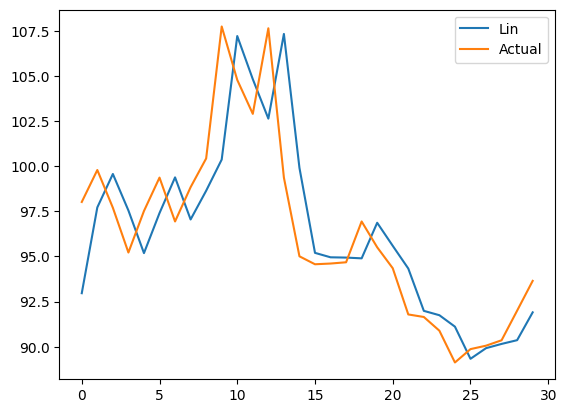

In [64]:
lin_pred = lin_model.predict(X_test)
plt.plot(lin_pred, label="Lin")
plt.plot(y_test, label = "Actual")
plt.legend()
plt.show()

In [65]:
# Calculating R2 Score
from sklearn.metrics import r2_score
r2_score(y_test, lin_pred)

0.6338824524189041

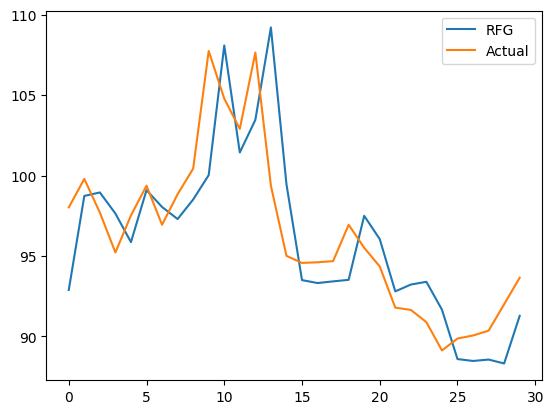

In [66]:
rfg_pred = rfg_model.predict(X_test)
plt.plot(rfg_pred, label="RFG")
plt.plot(y_test, label = "Actual")
plt.legend()
plt.show()

In [67]:
rmse = (mean_squared_error(y_test, lin_pred)) ** 0.5
rmse

2.955953271406441

In [68]:
rmse = (mean_squared_error(y_test, rfg_pred)) ** 0.5
rmse

3.2512648618782607

# RNN LSTM Model

In [69]:
TSLA_historical.set_index(pd.to_datetime(TSLA_historical["Date"]), inplace=True)
TSLA_historical

Date       Close  Close_lag_1  \
Date                                                                           
2015-01-12 00:00:00-05:00 2015-01-12 00:00:00-05:00 24.85300064  25.03599930   
2015-01-13 00:00:00-05:00 2015-01-13 00:00:00-05:00 25.09000015  24.85300064   
2015-01-14 00:00:00-05:00 2015-01-14 00:00:00-05:00 25.29649925  25.09000015   
2015-01-15 00:00:00-05:00 2015-01-15 00:00:00-05:00 25.20050049  25.29649925   
2015-01-16 00:00:00-05:00 2015-01-16 00:00:00-05:00 25.52300072  25.20050049   
...                                             ...         ...          ...   
2023-02-27 00:00:00-05:00 2023-02-27 00:00:00-05:00 89.87000275  89.12999725   
2023-02-28 00:00:00-05:00 2023-02-28 00:00:00-05:00 90.05999756  89.87000275   
2023-03-01 00:00:00-05:00 2023-03-01 00:00:00-05:00 90.36000061  90.05999756   
2023-03-02 00:00:00-05:00 2023-03-02 00:00:00-05:00 92.00000000  90.36000061   
2023-03-03 00:00:00-05:00 2023-03-03 00:00:00-05:00 93.65000153  92.00000000   

                           Close_lag_2  Close_lag_3  Close_lag_4  Close_lag_5  \
Date                                                                            
2015-01-12 00:00:00-05:00  25.34550095  25.25749969  25.33200073  25.97299957   
2015-01-13 00:00:00-05:00  25.03599930  25.34550095  25.25749969  25.33200073   
2015-01-14 00:00:00-05:00  24.85300064  25.03599930  25.34550095  25.25749969   
2015-01-15 00:00:00-05:00  25.09000015  24.85300064  25.03599930  25.34550095   
2015-01-16 00:00:00-05:00  25.29649925  25.09000015  24.85300064  25.03599930   
...                                ...          ...          ...          ...   
2023-02-27 00:00:00-05:00  90.88999939  91.65000153  91.79000092  94.34999847   
2023-02-28 00:00:00-05:00  89.12999725  90.88999939  91.65000153  91.79000092   
2023-03-01 00:00:00-05:00  89.87000275  89.12999725  90.88999939  91.65000153   
2023-03-02 00:00:00-05:00  90.05999756  89.87000275  89.12999725  90.88999939   
2023-03-03 00:00:00-05:00  90.36000061  90.05999756  89.87000275  89.12999725   

                           Close_lag_6  
Date                                    
2015-01-12 00:00:00-05:00  26.47750092  
2015-01-13 00:00:00-05:00  25.97299957  
2015-01-14 00:00:00-05:00  25.33200073  
2015-01-15 00:00:00-05:00  25.25749969  
2015-01-16 00:00:00-05:00  25.34550095  
...                                ...  
2023-02-27 00:00:00-05:00  95.51000214  
2023-02-28 00:00:00-05:00  94.34999847  
2023-03-01 00:00:00-05:00  91.79000092  
2023-03-02 00:00:00-05:00  91.65000153  
2023-03-03 00:00:00-05:00  90.88999939  

[2050 rows x 8 columns]

In [70]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [71]:
scalar.fit(train_set)
scaled_train = scalar.transform(train_set)
scaled_test = scalar.transform(test_set) 

In [72]:
scaled_train[-10:]
# print(len(scaled_train))

array([[0.49083291],
       [0.49995396],
       [0.50539459],
       [0.50859498],
       [0.53339784],
       [0.53027748],
       [0.53819845],
       [0.53155766],
       [0.53019752],
       [0.54563931]])

In [73]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [74]:
#define Generator
n_input = 7
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [75]:
X, y = generator[2010]
print(f"Given the Array: \n{X.flatten()}")
print(f"y: \n{y}")

Given the Array: 
[0.50035403 0.48939274 0.50883499 0.50707484 0.51419566 0.50587469
 0.49083291]
y: 
[[0.49995396]]


In [76]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [77]:
from keras.layers.rnn import lstm_v1
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation = "relu", input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer="adam", loss="mse")

In [78]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [79]:
#Fit model
lstm_model.fit(generator, epochs=50)

Epoch 1/50
2019/2019 [==============================] - 12s 5ms/step - loss: 0.0028
Epoch 2/50
2019/2019 [==============================] - 10s 5ms/step - loss: 5.8384e-04
Epoch 3/50
2019/2019 [==============================] - 10s 5ms/step - loss: 4.8438e-04
Epoch 4/50
2019/2019 [==============================] - 9s 5ms/step - loss: 3.7802e-04
Epoch 5/50
2019/2019 [==============================] - 9s 5ms/step - loss: 3.1631e-04
Epoch 6/50
2019/2019 [==============================] - 10s 5ms/step - loss: 3.0296e-04
Epoch 7/50
2019/2019 [==============================] - 10s 5ms/step - loss: 2.6398e-04
Epoch 8/50
2019/2019 [==============================] - 10s 5ms/step - loss: 2.8149e-04
Epoch 9/50
2019/2019 [==============================] - 9s 5ms/step - loss: 2.1373e-04
Epoch 10/50
2019/2019 [==============================] - 9s 4ms/step - loss: 2.2989e-04
Epoch 11/50
2019/2019 [==============================] - 9s 4ms/step - loss: 2.2702e-04
Epoch 12/50
2019/2019 [================

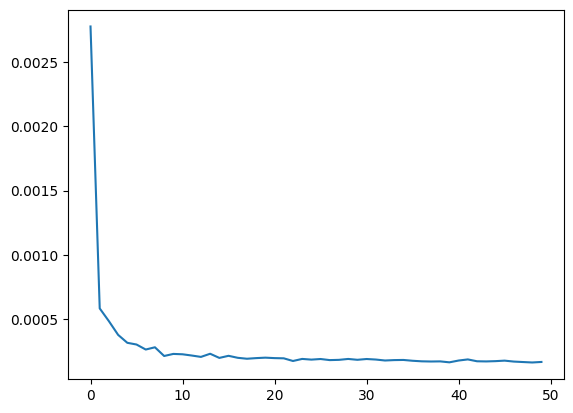

In [80]:
loss_per_epoch= lstm_model.history.history["loss"]
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [81]:
last_train_batch = scaled_train[-7:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [82]:
lstm_model.predict(last_train_batch)

1/1 [==============================] - 0s 285ms/step


array([[0.55099446]], dtype=float32)

In [83]:
scaled_test[0]

array([0.58540387])

In [84]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
for i in range(len(test_set)):
  
  # Get the prediction value for the first batch
  current_pred = lstm_model.predict(current_batch)[0]

  # Append the prediction into the array
  test_predictions.append(current_pred)

  # Use the prediction to update the batch and remove the first value
  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)
  
test_predictions

1/1 [==============================] - 0s 28ms/step


[array([0.55099446], dtype=float32),
 array([0.5569591], dtype=float32),
 array([0.5634012], dtype=float32),
 array([0.5698136], dtype=float32),
 array([0.5762599], dtype=float32),
 array([0.58276224], dtype=float32),
 array([0.5893328], dtype=float32),
 array([0.5959676], dtype=float32),
 array([0.6026657], dtype=float32),
 array([0.609427], dtype=float32),
 array([0.61625034], dtype=float32),
 array([0.62313473], dtype=float32),
 array([0.63007903], dtype=float32),
 array([0.6370822], dtype=float32),
 array([0.6441432], dtype=float32),
 array([0.65126085], dtype=float32),
 array([0.6584342], dtype=float32),
 array([0.66566217], dtype=float32),
 array([0.6729439], dtype=float32),
 array([0.68027836], dtype=float32),
 array([0.68767273], dtype=float32),
 array([0.6951311], dtype=float32),
 array([0.7026532], dtype=float32),
 array([0.71023935], dtype=float32),
 array([0.7178896], dtype=float32),
 array([0.7256042], dtype=float32),
 array([0.7333832], dtype=float32),
 array([0.7412267],

In [85]:
current_batch.shape

(1, 7, 1)

In [86]:
#Inverse Scaling
true_predictions = scalar.inverse_transform(test_predictions)

In [87]:
test_set['predictions'] = true_predictions

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3040\2961660118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['predictions'] = true_predictions


<AxesSubplot: xlabel='Date'>

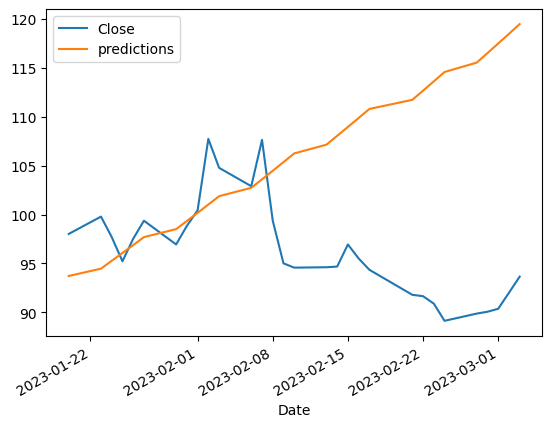

In [88]:
test_set.plot()

In [89]:
rmse = (mean_squared_error(test_set["Close"], test_set['predictions'])) ** 0.5
rmse

15.082940173455937

# FB Prophet

In [90]:
df = tesla.history(start="2015-01-01", end=datetime.now().date(), interval="1d").reset_index()
df

Date        Open        High         Low  \
0    2015-01-02 00:00:00-05:00 26.62999916 26.79000092 26.39399910   
1    2015-01-05 00:00:00-05:00 26.35750008 26.39949989 25.88750076   
2    2015-01-06 00:00:00-05:00 26.02499962 26.06049919 25.27750015   
3    2015-01-07 00:00:00-05:00 25.54750061 25.57449913 25.18250084   
4    2015-01-08 00:00:00-05:00 25.07550049 25.37500000 24.75099945   
...                        ...         ...         ...         ...   
2051 2023-02-27 00:00:00-05:00 89.87000275 90.16000366 89.33999634   
2052 2023-02-28 00:00:00-05:00 89.33000183 91.23000336 89.31999969   
2053 2023-03-01 00:00:00-05:00 89.98000336 91.02999878 89.66999817   
2054 2023-03-02 00:00:00-05:00 89.66000366 92.27999878 89.58999634   
2055 2023-03-03 00:00:00-05:00 92.48000336 93.73000336 92.44999695   

           Close    Volume  Dividends  Stock Splits  
0    26.47750092  26480000 0.00000000    0.00000000  
1    25.97299957  41182000 0.00000000    0.00000000  
2    25.33200073  54456000 0.00000000    0.00000000  
3    25.25749969  46918000 0.00000000    0.00000000  
4    25.34550095  73054000 0.00000000    0.00000000  
...          ...       ...        ...           ...  
2051 89.87000275  27502300 0.00000000    0.00000000  
2052 90.05999756  30142000 0.00000000    0.00000000  
2053 90.36000061  31111200 0.00000000    0.00000000  
2054 92.00000000  32204400 0.00000000    0.00000000  
2055 93.65000153  35133300 0.00000000    0.00000000  

[2056 rows x 8 columns]

In [91]:
df = df[["Date", "Close"]].rename(columns={"Date":"ds", "Close":"y"})
df

ds           y
0    2015-01-02 00:00:00-05:00 26.47750092
1    2015-01-05 00:00:00-05:00 25.97299957
2    2015-01-06 00:00:00-05:00 25.33200073
3    2015-01-07 00:00:00-05:00 25.25749969
4    2015-01-08 00:00:00-05:00 25.34550095
...                        ...         ...
2051 2023-02-27 00:00:00-05:00 89.87000275
2052 2023-02-28 00:00:00-05:00 90.05999756
2053 2023-03-01 00:00:00-05:00 90.36000061
2054 2023-03-02 00:00:00-05:00 92.00000000
2055 2023-03-03 00:00:00-05:00 93.65000153

[2056 rows x 2 columns]

In [92]:
df["ds"] = [c.date() for c in df['ds']]
df

ds           y
0     2015-01-02 26.47750092
1     2015-01-05 25.97299957
2     2015-01-06 25.33200073
3     2015-01-07 25.25749969
4     2015-01-08 25.34550095
...          ...         ...
2051  2023-02-27 89.87000275
2052  2023-02-28 90.05999756
2053  2023-03-01 90.36000061
2054  2023-03-02 92.00000000
2055  2023-03-03 93.65000153

[2056 rows x 2 columns]

<AxesSubplot: >

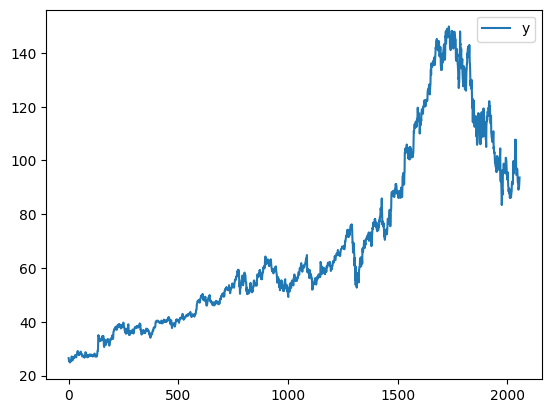

In [93]:
df.plot()

In [94]:
fb_train_set = df[:-30]
fb_test_set = df[-30:]

In [95]:
fb_train_set

ds           y
0     2015-01-02 26.47750092
1     2015-01-05 25.97299957
2     2015-01-06 25.33200073
3     2015-01-07 25.25749969
4     2015-01-08 25.34550095
...          ...         ...
2021  2023-01-12 91.12999725
2022  2023-01-13 92.12000275
2023  2023-01-17 91.29000092
2024  2023-01-18 91.12000275
2025  2023-01-19 93.05000305

[2026 rows x 2 columns]

In [96]:
m = Prophet()
m.fit(fb_train_set)
future = m.make_future_dataframe(periods=60) 
forecast = m.predict(future)

18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing


In [97]:
forecast.tail()

ds       trend  yhat_lower   yhat_upper  trend_lower  \
2081 2023-03-16 95.26514414 87.39430312 102.47076375  94.84523417   
2082 2023-03-17 95.19365557 87.79463436 102.54248906  94.75337615   
2083 2023-03-18 95.12216701 87.85290196 102.57275127  94.65392276   
2084 2023-03-19 95.05067844 87.37836835 103.02435349  94.56572782   
2085 2023-03-20 94.97918987 86.96336837 102.33360315  94.47635812   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
2081  95.77836256     -0.23980631           -0.23980631           -0.23980631   
2082  95.73708298     -0.34891273           -0.34891273           -0.34891273   
2083  95.70368687     -0.17770713           -0.17770713           -0.17770713   
2084  95.66523102     -0.20970956           -0.20970956           -0.20970956   
2085  95.61162042     -0.39336123           -0.39336123           -0.39336123   

          weekly  weekly_lower  weekly_upper      yearly  yearly_lower  \
2081 -0.01476597   -0.01476597   -0.01476597 -0.22504034   -0.22504034   
2082 -0.08440844   -0.08440844   -0.08440844 -0.26450429   -0.26450429   
2083  0.12234704    0.12234704    0.12234704 -0.30005417   -0.30005417   
2084  0.12234730    0.12234730    0.12234730 -0.33205686   -0.33205686   
2085 -0.03250429   -0.03250429   -0.03250429 -0.36085694   -0.36085694   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
2081   -0.22504034            0.00000000                  0.00000000   
2082   -0.26450429            0.00000000                  0.00000000   
2083   -0.30005417            0.00000000                  0.00000000   
2084   -0.33205686            0.00000000                  0.00000000   
2085   -0.36085694            0.00000000                  0.00000000   

      multiplicative_terms_upper        yhat  
2081                  0.00000000 95.02533783  
2082                  0.00000000 94.84474284  
2083                  0.00000000 94.94445988  
2084                  0.00000000 94.84096888  
2085                  0.00000000 94.58582864

In [98]:
fb_test_set.tail()

ds           y
2051  2023-02-27 89.87000275
2052  2023-02-28 90.05999756
2053  2023-03-01 90.36000061
2054  2023-03-02 92.00000000
2055  2023-03-03 93.65000153

In [99]:
plot_plotly(m, forecast)

In [100]:
plot_components_plotly(m, forecast)

In [101]:
from statsmodels.tools.eval_measures import rmse

In [102]:
predictions = forecast.iloc[-30:]['yhat']

In [103]:
print("RMSE between actual and predicted values: ", rmse(predictions, fb_test_set['y']))
print("Mean value of Test Dataset: ", fb_test_set["y"].mean())

RMSE between actual and predicted values:  4.164055657638316
Mean value of Test Dataset:  96.37766672770182


In [104]:
rmse = (mean_squared_error(fb_test_set["y"], predictions)) ** 0.5
rmse

4.164055657638316

# SES

In [105]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



TypeError: unsupported operand type(s) for +: 'int' and 'datetime.datetime'

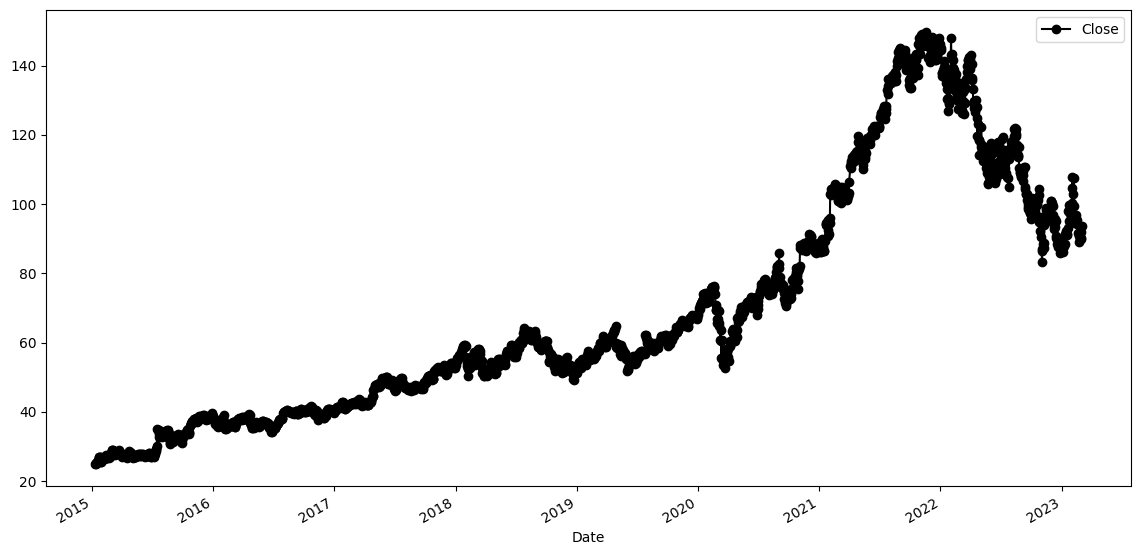

In [106]:
ses(TSLA_historical["Close"],train_set, test_set, 0, datetime(2023, 2, 27))